<a href="https://www.kaggle.com/code/fazliddinhatamov/pnevmoniya?scriptVersionId=141750450" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision.all import *
from ipywidgets import widgets

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/pnevmoniya-uchun/sample_solution.csv
/kaggle/input/pnevmoniya-uchun/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya-uchun/test/test_img_10057.jp

In [2]:
train = Path('/kaggle/input/pnevmoniya-uchun/train')
test = Path('/kaggle/input/pnevmoniya-uchun/test')
sample_solution = pd.read_csv('/kaggle/input/pnevmoniya-uchun/sample_solution.csv')

In [3]:
sample_solution

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


In [4]:
sample_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      624 non-null    object
 1   labels  624 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.9+ KB


In [5]:
train.ls()
fls = get_image_files(train)
fls

(#5216) [Path('/kaggle/input/pnevmoniya-uchun/train/PNEUMONIA/person1180_virus_2010.jpeg'),Path('/kaggle/input/pnevmoniya-uchun/train/PNEUMONIA/person1230_virus_2081.jpeg'),Path('/kaggle/input/pnevmoniya-uchun/train/PNEUMONIA/person1513_virus_2632.jpeg'),Path('/kaggle/input/pnevmoniya-uchun/train/PNEUMONIA/person124_virus_238.jpeg'),Path('/kaggle/input/pnevmoniya-uchun/train/PNEUMONIA/person746_virus_1369.jpeg'),Path('/kaggle/input/pnevmoniya-uchun/train/PNEUMONIA/person588_bacteria_2422.jpeg'),Path('/kaggle/input/pnevmoniya-uchun/train/PNEUMONIA/person466_virus_960.jpeg'),Path('/kaggle/input/pnevmoniya-uchun/train/PNEUMONIA/person1590_bacteria_4175.jpeg'),Path('/kaggle/input/pnevmoniya-uchun/train/PNEUMONIA/person399_bacteria_1805.jpeg'),Path('/kaggle/input/pnevmoniya-uchun/train/PNEUMONIA/person59_bacteria_279.jpeg')...]

In [6]:
# xatoliklari borligini tekshirib korildi
failed = verify_images(train)
failed

'PosixPath' object is not iterable


(#0) []

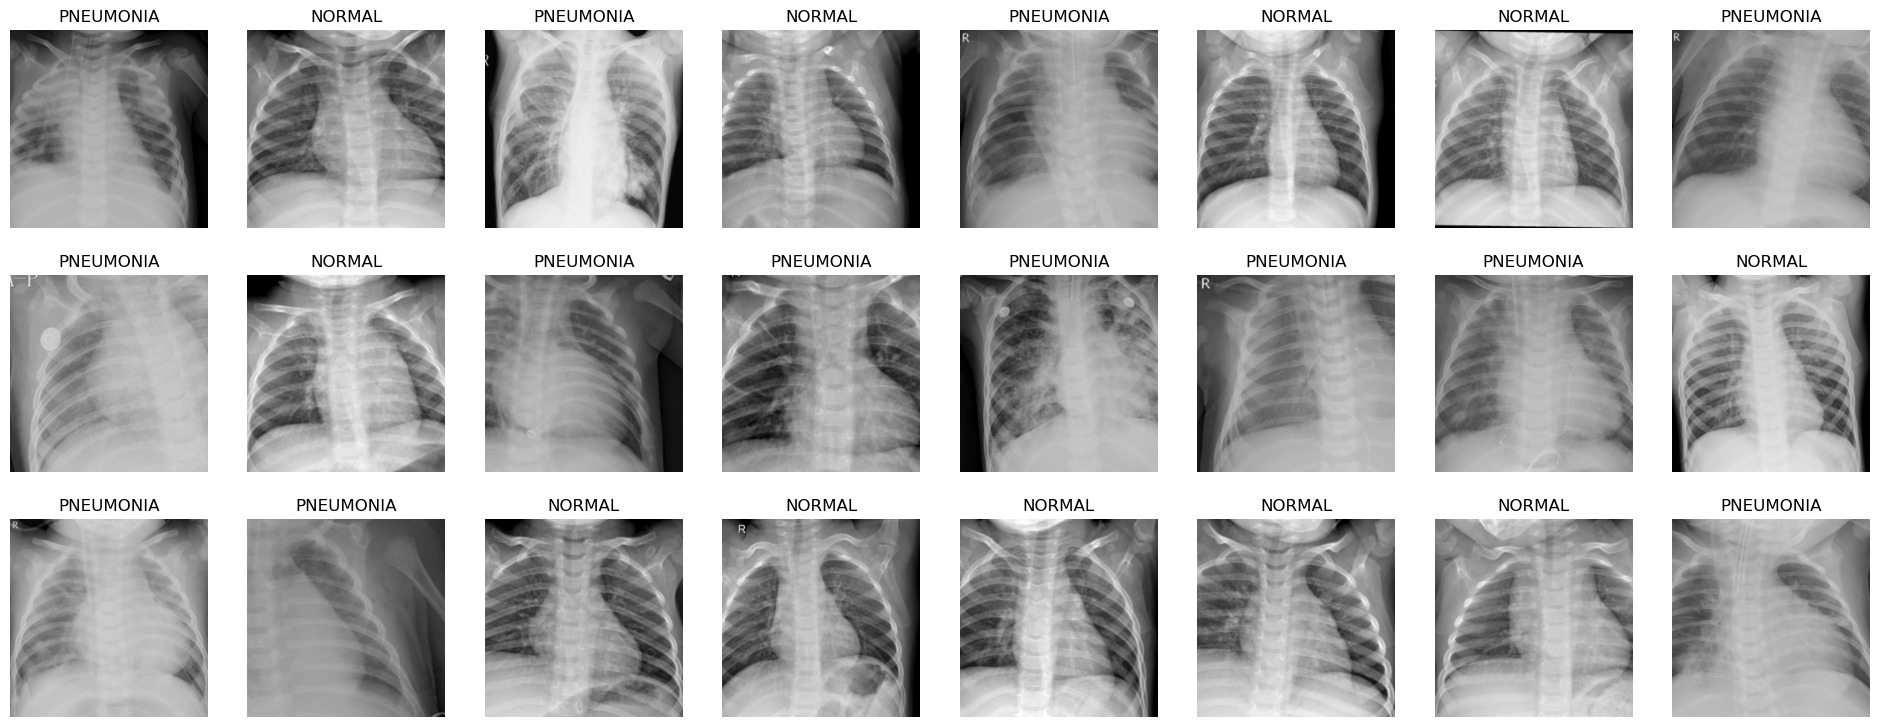

In [7]:
#DataBlock yaratamiz
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#Dataloader yaratamiz
dls = transports.dataloaders(train)

#Datasetni tekshirildi
dls.train.show_batch(max_n=24, nrows=3)

In [8]:
#Train
learn34 = cnn_learner(dls, resnet34, metrics=accuracy)
learn34.fine_tune(10)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.476467,0.223803,0.921381,01:58


epoch,train_loss,valid_loss,accuracy,time
0,0.149005,0.100694,0.969319,01:46
1,0.090095,0.060079,0.979866,01:48
2,0.065864,0.087158,0.978907,01:49
3,0.049050,0.068514,0.980825,01:48
4,0.037248,0.096145,0.972196,01:48
5,0.023612,0.053517,0.984660,01:45
6,0.017839,0.063026,0.983701,01:46
7,0.009421,0.053813,0.984660,01:50
8,0.007728,0.052655,0.983701,01:47
9,0.005950,0.054018,0.984660,01:48


In [9]:
#Dowload_model
learn34.export('learn34.pkl')

In [10]:
vgg16 = cnn_learner(dls, vgg16_bn, metrics=accuracy)
vgg16.fine_tune(10)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313

epoch,train_loss,valid_loss,accuracy,time
0,0.445379,0.182055,0.944391,01:54


epoch,train_loss,valid_loss,accuracy,time
0,0.154558,0.085833,0.976031,01:59
1,0.090734,0.078059,0.980825,01:59
2,0.059361,0.122196,0.970278,01:59
3,0.039814,0.070630,0.978907,01:59
4,0.032457,0.078156,0.981783,01:58
5,0.017358,0.058196,0.987536,01:58
6,0.011642,0.039044,0.993289,02:00
7,0.008461,0.036583,0.992330,02:00
8,0.005769,0.033836,0.992330,02:00
9,0.002597,0.033488,0.993289,01:58


In [11]:
vgg16.export('vgg16.pkl')

In [12]:
learn50 = cnn_learner(dls, resnet50, metrics=accuracy)
learn50.fine_tune(10)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

epoch,train_loss,valid_loss,accuracy,time
0,0.445410,0.198155,0.956855,01:48


epoch,train_loss,valid_loss,accuracy,time
0,0.162436,0.094769,0.973154,01:51
1,0.099396,0.147493,0.970278,01:53
2,0.087909,0.153800,0.959732,01:53
3,0.063096,0.045377,0.986577,01:52
4,0.035400,0.054295,0.984660,01:52
5,0.027288,0.044066,0.988495,01:53
6,0.020147,0.040381,0.989453,01:53
7,0.018204,0.035481,0.992330,01:52
8,0.007728,0.035423,0.993289,01:52
9,0.006827,0.040299,0.990412,01:50


In [13]:
learn50.export('learn50.pkl')

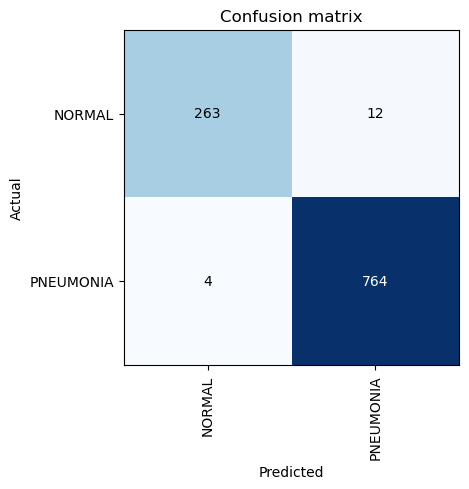

In [14]:
interp34 = ClassificationInterpretation.from_learner(learn34)
interp34.plot_confusion_matrix()

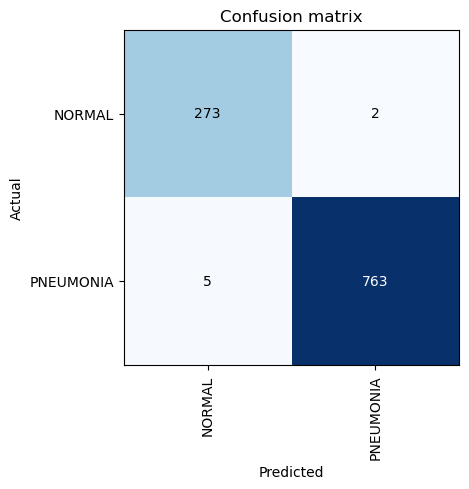

In [15]:
interp16 = ClassificationInterpretation.from_learner(vgg16)
interp16.plot_confusion_matrix()

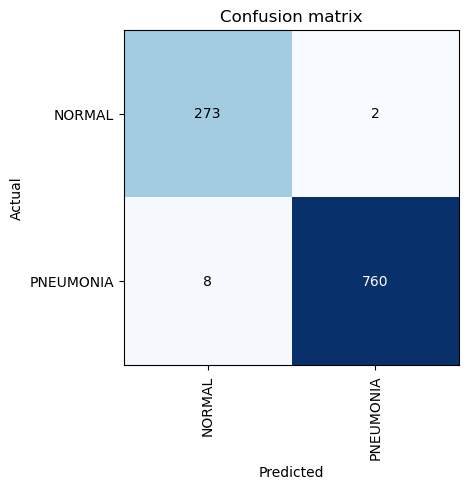

In [16]:
interp50 = ClassificationInterpretation.from_learner(learn50)
interp50.plot_confusion_matrix()

In [17]:
interp34.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.99      0.96      0.97       275
   PNEUMONIA       0.98      0.99      0.99       768

    accuracy                           0.98      1043
   macro avg       0.98      0.98      0.98      1043
weighted avg       0.98      0.98      0.98      1043



In [18]:
interp16.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.98      0.99      0.99       275
   PNEUMONIA       1.00      0.99      1.00       768

    accuracy                           0.99      1043
   macro avg       0.99      0.99      0.99      1043
weighted avg       0.99      0.99      0.99      1043



In [19]:
interp50.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       275
   PNEUMONIA       1.00      0.99      0.99       768

    accuracy                           0.99      1043
   macro avg       0.98      0.99      0.99      1043
weighted avg       0.99      0.99      0.99      1043



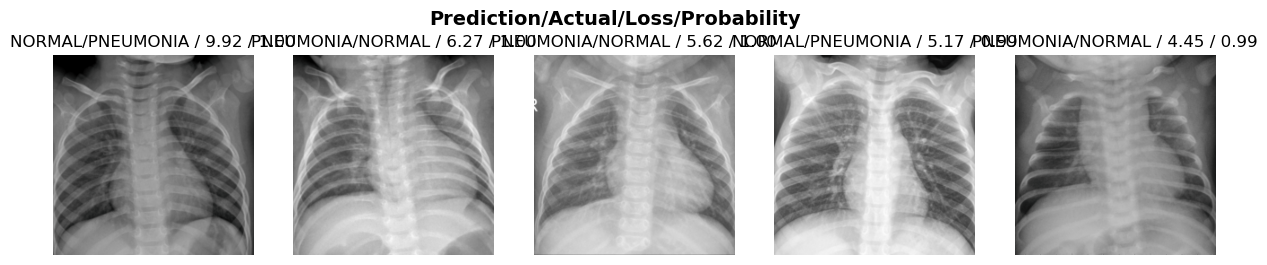

In [20]:
interp34.plot_top_losses(5, nrows=1)

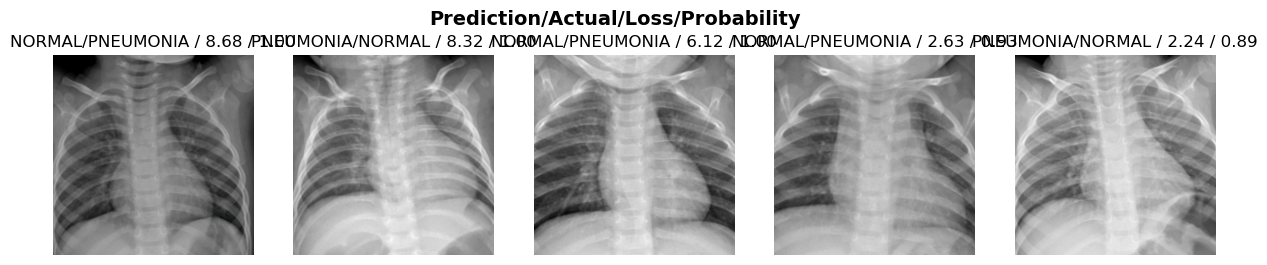

In [21]:
interp16.plot_top_losses(5, nrows=1)

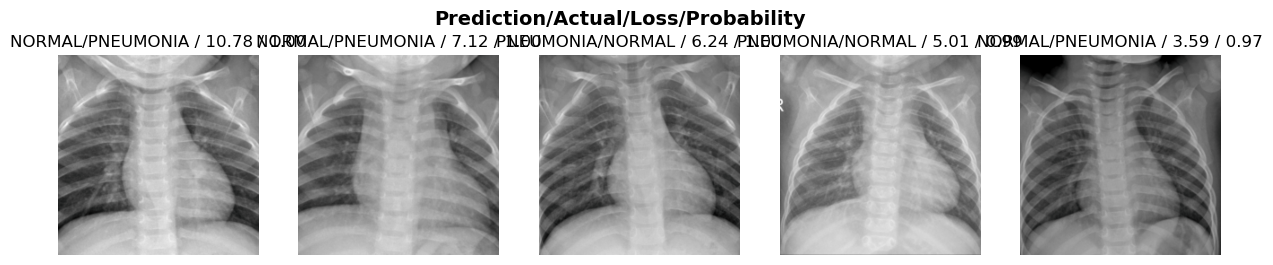

In [22]:
interp50.plot_top_losses(5, nrows=1)

In [23]:
sample_solution34 = pd.read_csv('/kaggle/input/pnevmoniya-uchun/sample_solution.csv')
for i in range(len(sample_solution34)):
  label = sample_solution34.iloc[i, 0]
  img = PILImage.create(Path(f'/kaggle/input/pnevmoniya-uchun/test/{label}'))
  pred34, pred_id, probs = learn34.predict(img)
  sample_solution34.iloc[i, 1] = pred34

In [24]:
sample_solution50 = pd.read_csv('/kaggle/input/pnevmoniya-uchun/sample_solution.csv')
for i in range(len(sample_solution50)):
  label = sample_solution50.iloc[i, 0]
  img = PILImage.create(Path(f'/kaggle/input/pnevmoniya-uchun/test/{label}'))
  pred50, pred_id, probs = learn50.predict(img)
  sample_solution50.iloc[i, 1] = pred50

In [25]:
sample_solution16 = pd.read_csv('/kaggle/input/pnevmoniya-uchun/sample_solution.csv')
for i in range(len(sample_solution16)):
  label = sample_solution16.iloc[i, 0]
  img = PILImage.create(Path(f'/kaggle/input/pnevmoniya-uchun/test/{label}'))
  pred16, pred_id, probs = vgg16.predict(img)
  sample_solution16.iloc[i, 1] = pred16

In [26]:
mapping = {'PNEUMONIA': 1, 'NORMAL': 0}

df34 = sample_solution34.replace({'labels': mapping})

In [27]:
mapping = {'PNEUMONIA': 1, 'NORMAL': 0}

df16 = sample_solution16.replace({'labels': mapping})

In [28]:
mapping = {'PNEUMONIA': 1, 'NORMAL': 0}

df50 = sample_solution50.replace({'labels': mapping})

In [29]:
df34.to_csv('javob34.csv',index=False)

In [30]:
df16.to_csv('javob16.csv',index=False)

In [31]:
df50.to_csv('javob50.csv',index=False)